In [49]:
import pandas as pd

# Load Dataset
data = pd.read_csv("processed_data.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [50]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['AQI_Bucket'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_AQI_Bucket'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_AQI_Bucket']

# Drop AQI_Bucket
data = data.drop(columns=['AQI_Bucket'])

In [11]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0
24846,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0
24847,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0
24848,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0


In [51]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['City'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_City'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_City']

# Drop AQI_Bucket
data = data.drop(columns=['City'])

In [13]:
data

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket,Encoded_City
0,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0,0.0
1,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0,0.0
2,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0,0.0
3,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0,0.0
4,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0,25.0
24846,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0,25.0
24847,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0,25.0
24848,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0,25.0


In [52]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [53]:
data = data.drop(columns=['Date','AQI'])

In [16]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Encoded_AQI_Bucket,Encoded_City,year,month,day
0,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,3.0,0.0,2015,1,29
1,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,4.0,0.0,2015,1,30
2,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,5.0,0.0,2015,1,31
3,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,5.0,0.0,2015,2,1
4,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,5.0,0.0,2015,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,0.0,25.0,2020,6,27
24846,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,1.0,25.0,2020,6,28
24847,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,1.0,25.0,2020,6,29
24848,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,1.0,25.0,2020,6,30


In [58]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

X = data.drop('Encoded_AQI_Bucket', axis=1)
y = data['Encoded_AQI_Bucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)


In [59]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.8120724346076459

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       282
         1.0       0.85      0.87      0.86      1655
         2.0       0.82      0.85      0.84      1745
         3.0       0.68      0.64      0.66       555
         4.0       0.76      0.74      0.75       462
         5.0       0.86      0.80      0.83       271

    accuracy                           0.81      4970
   macro avg       0.80      0.77      0.78      4970
weighted avg       0.81      0.81      0.81      4970



In [62]:
k = 3  # Define the number of folds
scores = cross_val_score(xgb_model, X, y, cv=k, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")

Cross-validation scores: [0.35007243 0.54460944 0.62779186]
Mean accuracy: 0.507491244217925


Accuracy: 0.8120724346076459
Balanced Accuracy: 0.7658998684351775
Average Precision: 0.8480131608712531
F1 Score (Micro): 0.8120724346076459
F1 Score (Macro): 0.7812950461763849
F1 Score (Weighted): 0.8109823211753381
Precision: 0.8112123057760446
Recall: 0.8120724346076459
Cohen's Kappa: 0.7435281463325748
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       282
         1.0       0.85      0.87      0.86      1655
         2.0       0.82      0.85      0.84      1745
         3.0       0.68      0.64      0.66       555
         4.0       0.76      0.74      0.75       462
         5.0       0.86      0.80      0.83       271

    accuracy                           0.81      4970
   macro avg       0.80      0.77      0.78      4970
weighted avg       0.81      0.81      0.81      4970



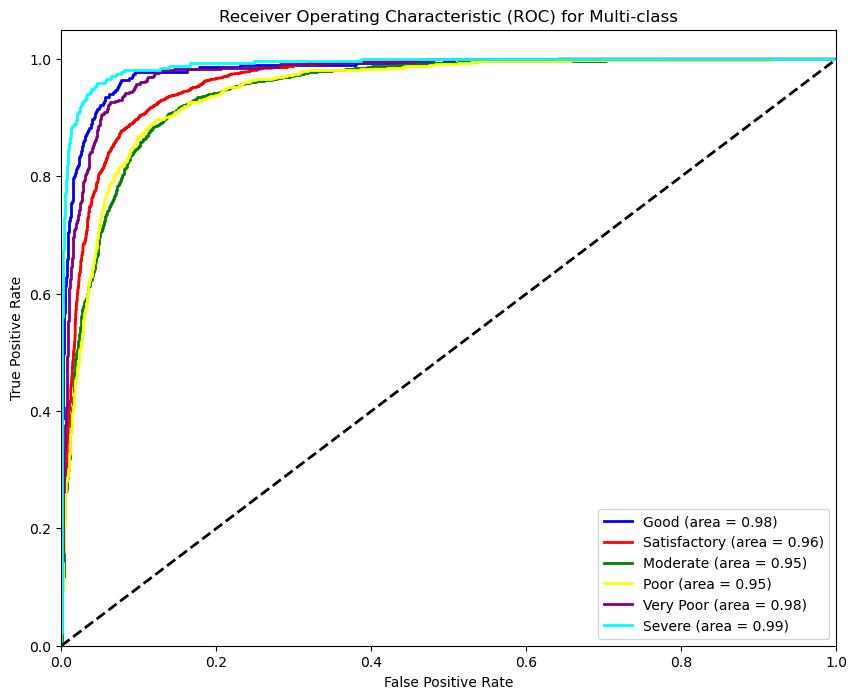

In [56]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             balanced_accuracy_score, average_precision_score, f1_score, log_loss,
                             precision_score, recall_score, roc_auc_score, cohen_kappa_score, roc_curve, auc)
import matplotlib.pyplot as plt

# Define y_proba_ovr before using it
y_proba_ovr = xgb_model.predict_proba(X_test)

# Now, compute the metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
y_test_bin = pd.get_dummies(y_test)
print(f'Average Precision: {average_precision_score(y_test_bin, y_proba_ovr)}')  # Multi-class classification

print(f'F1 Score (Micro): {f1_score(y_test, y_pred, average="micro")}')
print(f'F1 Score (Macro): {f1_score(y_test, y_pred, average="macro")}')
print(f'F1 Score (Weighted): {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred)}")

print('Classification Report:')
print(classification_report(y_test, y_pred))

# ROC Curve for multi-class using one-vs-rest approach
categories_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
n_classes = len(categories_order)
y_test_bin = pd.get_dummies(y_test)
y_proba_ovr = xgb_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(categories_order[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()